In [1]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Reading the dataset
car = pd.read_csv("car data.csv", header=0)

In [3]:
# seeing the first 5 rows od dataframe
car.head()
# illy, car.tail(), car.shape, car.info(), car.describe(),car.index, car.columns 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Seeing column names in car df
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# checking categories in categorical columns, for count car['Transmission'].nunique(), for count in each category car['Transmission'].value_counts()
car['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [6]:
# Checking null values, car.isna().sum()
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# taking subset, leaving Car_name
cars = car.iloc[:,1:]

In [8]:
# Creating a new feature as follows
cars['current_year'] = 2020

In [9]:
# Taking depreciation of vehicle in no. of years
cars['no_year'] = cars['current_year'] - cars['Year']

In [10]:
# Dropping the year column
cars.drop(['Year'], axis=1, inplace=True)

In [11]:
# Creating dummies for categoricals in cars dataset, one hot encoding
cars = pd.get_dummies(cars, drop_first=True)

In [12]:
cars.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [13]:
# Dropping the current year column as well
cars.drop('current_year', axis=1, inplace=True)

In [14]:
# Visualizing correlation through heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cars[cars.corr().index].corr(), annot=True, cmap='RdYlGn')
plt.show()

"plt.figure(figsize=(20,20))\nsns.heatmap(cars[cars.corr().index].corr(), annot=True, cmap='RdYlGn')\nplt.show()"

In [15]:
# Taking dependent and Independent features
X = cars.iloc[:,1:]
y = cars.iloc[:,0]

In [16]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
# seeing importance of each feature
model.feature_importances_

array([0.39323094, 0.04030059, 0.00117911, 0.07962946, 0.21639577,
       0.00904237, 0.12738046, 0.13284129])

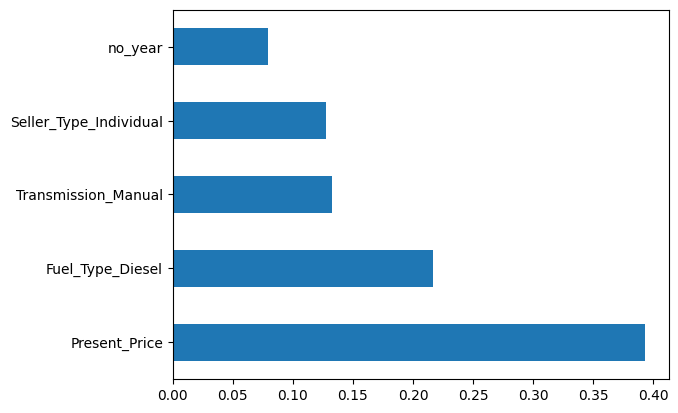

In [18]:
# Visualizing feature imp values
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [20]:
# Creating train-test split in 80-20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# Importing Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [ ]:
#### Hyperparameters
n_estimators = [int(x) for i in np.linspace(start=100, stop=1200, num=6)]
print(n_estimators)

In [33]:
# Randomised search CV

# for no of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

# for no of features to consider at every split
max_features = ['auto','sqrt']

# Maxm no of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

# Min no of samples required to split at a node
min_samples_split = [2,5,10,15,100]

# Min no samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Create the random Grid
random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# Use the random_grid to search for best hyperparameters
# first create the best model to tune
rf = RandomForestRegressor()

In [35]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, scoring="neg_mean_squared_error", n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1 )

In [36]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=980; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=980; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=980; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=980; total time=   1.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=980; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estima

C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=980; total time=   1.5s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=980; total time=   1.5s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=980; total time=   1.5s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=980; total time=   1.5s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=980; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=540; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=540; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=760; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=760; total time=   1.0s
[CV] END max_depth=25, max_featu

C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=320; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=320; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=320; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=320; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=320; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=980; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=980; total time=   1.4s
[CV] END max_depth=10, max_features=sqr

C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=540; total time=   1.0s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=540; total time=   1.0s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=540; total time=   1.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=540; total time=   1.0s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=540; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
y_pred = rf_random.predict(X_test)

In [39]:
y_pred

array([ 1.13238147,  0.39129853,  8.04562361,  4.92267104,  8.81530067,
        4.99755077,  1.14189442,  5.31603891,  5.13828097,  0.15403606,
        8.29711053,  3.6411922 ,  7.76394675,  4.81708031, 20.0581463 ,
        3.39934483,  2.87301109,  2.81072527,  5.30089761,  4.38595985,
        0.20148324,  6.1425248 , 13.86564999,  5.64538523,  2.48447104,
        0.76839742,  8.0507568 ,  1.17867689,  7.25964236,  0.79268818,
        0.43309248,  0.56904821,  5.09443943,  7.1556701 ,  0.37753081,
        9.07028737,  2.86719472,  2.50631513,  5.34268725,  0.55670989,
        0.35611389, 11.71309173,  0.73497728,  0.58488493,  5.42350056,
       12.73729213,  4.41407906,  2.9297546 ,  6.20075032,  3.3093575 ,
        0.2306418 ,  0.38679672, 21.00116137,  0.43278869,  0.49239233,
        9.22754471, 17.84457739,  5.88167046,  7.47344934,  1.41830536,
        0.83997995])

C:\Users\sbgha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


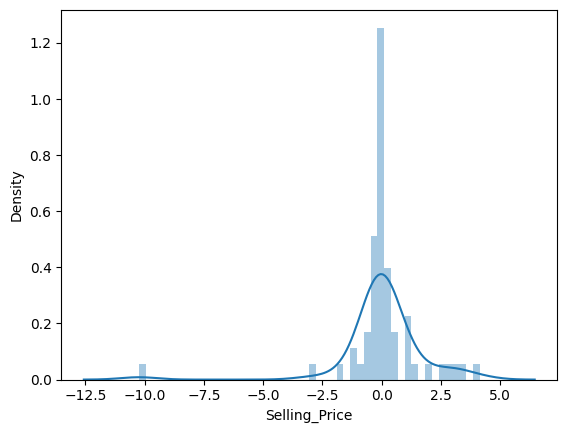

In [40]:
sns.distplot(y_test-y_pred)
plt.show()

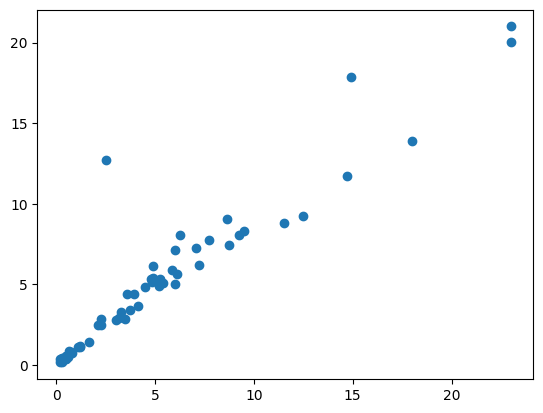

In [41]:
plt.scatter(y_test, y_pred)
plt.show()

In [42]:
import pickle
# open a file where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
